# Metadata

```yaml
course:   DS 5001 
module:   Final Project
topic:    Text Analysis and Exploration
author:   Eric Tria
date:     2 May 2023
```

# Student Info

```yaml
name:     Eric Tria
user_id:  emt4wf
email:    emt4wf@virginia.edu
```

# Text Analysis and Exploration

In [1]:
import pandas as pd
import numpy as np

from lib.text_helper import TextHelper
from lib.corpus_enhancer import CorpusEnhancer

In [2]:
final_dir = 'final/'
series_prefixes = ['PNR', 'B99', 'OFFICE']

OHCO = ['series_id', 'season_id', 'episode_id', 'scene_id', 'line_id', 'token_id']
TOKENS = OHCO[:6]
LINES = OHCO[:5]
SCENES = OHCO[:4]
EPISODES = OHCO[:3]
SEASONS = OHCO[:2]
SERIES = OHCO[:1]

colors = 'YlGnBu'

In [3]:
text_helper = TextHelper()

In [4]:
CORPUS_RAW = pd.read_csv(final_dir + 'ALL-CORPUS.csv')
VOCAB_EPS_RAW = pd.read_csv(final_dir + 'ALL-VOCAB-EPS.csv')
LIB_RAW = pd.read_csv(final_dir + 'ALL-LIB.csv')
LIB_EPS_RAW = pd.read_csv(final_dir + 'ALL-LIB-EPS.csv')

In [70]:
PNR_CORPUS = pd.read_csv(final_dir + 'PNR-CORPUS.csv')
B99_CORPUS = pd.read_csv(final_dir + 'B99-CORPUS.csv')
OFFICE_CORPUS = pd.read_csv(final_dir + 'OFFICE-CORPUS.csv')

PNR_VOCAB_SCENES = pd.read_csv(final_dir + 'PNR-VOCAB-SCENES.csv')
B99_VOCAB_SCENES = pd.read_csv(final_dir + 'B99-VOCAB-SCENES.csv')
OFFICE_VOCAB_SCENES = pd.read_csv(final_dir + 'OFFICE-VOCAB-SCENES.csv')

## 1. Clustering

The first thing we will check is if the any of the seasons between the 3 TV series are related in some way.

We will load the combined CORPUS and set the OHCO to EPISODES

In [5]:
CORPUS_CLUST = CORPUS_RAW.copy()
CORPUS_CLUST = CORPUS_CLUST.set_index(EPISODES).drop(list(set(OHCO) - set(EPISODES)), axis = 1)

CORPUS_CLUST

Unnamed: 0         pos_tuple   pos  \
series_id   season_id episode_id                                       
parksandrec 1         1                    0  ('Hello.', 'NN')    NN   
                      1                    1     ('Hi.', 'NN')    NN   
                      1                    2    ('My', 'PRP$')  PRP$   
                      1                    3    ('name', 'NN')    NN   
                      1                    4     ('is', 'VBZ')   VBZ   
...                                      ...               ...   ...   
theoffice   9         23              564623    ('that', 'IN')    IN   
                      23              564624    ('kind', 'NN')    NN   
                      23              564625      ('of', 'IN')    IN   
                      23              564626     ('the', 'DT')    DT   
                      23              564627  ('point?', 'NN')    NN   

                                 token_str term_str  
series_id   season_id episode_id                     
parksandrec 1         1             Hello.    hello  
                      1                Hi.       hi  
                      1                 My       my  
                      1               name     name  
                      1                 is       is  
...                                    ...      ...  
theoffice   9         23              that     that  
                      23              kind     kind  
                      23                of       of  
                      23               the      the  
                      23            point?    point  

[1563801 rows x 5 columns]

In [6]:
VOCAB_CLUST = VOCAB_EPS_RAW.copy()
VOCAB_CLUST = VOCAB_CLUST.set_index('term_str')

VOCAB_CLUST

n  n_chars             p          i         h max_pos  n_pos  \
term_str                                                                   
0          17        1  1.087610e-05  16.488480  0.000179      CD      2   
00          1        2  6.397703e-07  20.575943  0.000013      CD      1   
000003      1        6  6.397703e-07  20.575943  0.000013      NN      1   
000007044   1        9  6.397703e-07  20.575943  0.000013      CD      1   
001834310   1        9  6.397703e-07  20.575943  0.000013      CD      1   
...        ..      ...           ...        ...       ...     ...    ...   
ühumming    1        8  6.397703e-07  20.575943  0.000013      NN      1   
ümusical    4        8  2.559081e-06  18.575943  0.000048      NN      1   
ünew        1        4  6.397703e-07  20.575943  0.000013      NN      1   
üphone      1        6  6.397703e-07  20.575943  0.000013      NN      1   
а           2        1  1.279541e-06  19.575943  0.000025      CD      1   

                cat_pos  stop  tfidf_mean  tfidf_sum  tfidf_median  tfidf_max  \
term_str                                                                        
0          {'NN', 'CD'}     0    0.001519   0.022779      0.001325   0.003502   
00               {'CD'}     0    0.002166   0.002166      0.002166   0.002166   
000003           {'NN'}     0    0.002497   0.002497      0.002497   0.002497   
000007044        {'CD'}     0    0.002036   0.002036      0.002036   0.002036   
001834310        {'CD'}     0    0.001975   0.001975      0.001975   0.001975   
...                 ...   ...         ...        ...           ...        ...   
ühumming         {'NN'}     0    0.003122   0.003122      0.003122   0.003122   
ümusical         {'NN'}     0    0.012489   0.012489      0.012489   0.012489   
ünew             {'NN'}     0    0.002973   0.002973      0.002973   0.002973   
üphone           {'NN'}     0    0.002310   0.002310      0.002310   0.002310   
а                {'CD'}     0    0.004313   0.004313      0.004313   0.004313   

               dfidf  
term_str              
0          73.603359  
00          8.813781  
000003      8.813781  
000007044   8.813781  
001834310   8.813781  
...              ...  
ühumming    8.813781  
ümusical    8.813781  
ünew        8.813781  
üphone      8.813781  
а           8.813781  

[32686 rows x 14 columns]

Reduce the number of features in the returned TFIDF matrix to the 1000 most significant terms, using DFIDF as your significance measure and only using terms whose maximum part-of-speech belongs to this set: `NN NNS VB VBD VBG VBN VBP VBZ JJ JJR JJS RB RBR RBS`. Note, these are all open categories, excluding proper nounns.

In [7]:
max_pos_set = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'RB', 'RBR', 'RBS']
VOCAB_SIG = VOCAB_CLUST.copy()
VOCAB_SIG = VOCAB_SIG[VOCAB_SIG['max_pos'].isin(max_pos_set)]
VOCAB_SIG = VOCAB_SIG.sort_values('dfidf', ascending = False).head(1000)

VOCAB_SIG

n  n_chars         p          i         h max_pos  n_pos  \
term_str                                                               
lady      247        4  0.000158  12.627575  0.001995      NN      2   
clear     253        5  0.000162  12.592949  0.002038      JJ      2   
answer    236        6  0.000151  12.693300  0.001917      NN      2   
lose      240        4  0.000154  12.669052  0.001945      VB      4   
met       242        3  0.000155  12.657079  0.001960      NN      2   
...       ...      ...       ...        ...       ...     ...    ...   
meat      110        4  0.000070  13.794583  0.000971      NN      1   
tired      89        5  0.000057  14.100209  0.000803     VBN      2   
destroy    84        7  0.000054  14.183625  0.000762      NN      1   
freaking   88        8  0.000056  14.116511  0.000795     VBG      2   
whos      567        4  0.000363  11.428738  0.004146      NN      1   

                            cat_pos  stop  tfidf_mean  tfidf_sum  \
term_str                                                           
lady                   {'JJ', 'NN'}     0    0.000621   0.103006   
clear                  {'JJ', 'NN'}     0    0.000619   0.102788   
answer                 {'VB', 'NN'}     0    0.000584   0.097014   
lose      {'JJ', 'VB', 'VBP', 'NN'}     0    0.000603   0.100073   
met                   {'NNP', 'NN'}     0    0.000605   0.100446   
...                             ...   ...         ...        ...   
meat                         {'NN'}     0    0.001341   0.085852   
tired                 {'NN', 'VBN'}     0    0.001137   0.072737   
destroy                      {'NN'}     0    0.001061   0.067891   
freaking              {'VBG', 'NN'}     0    0.001122   0.071826   
whos                         {'NN'}     0    0.000339   0.100283   

          tfidf_median  tfidf_max       dfidf  
term_str                                       
lady          0.000452   0.002362  238.831132  
clear         0.000475   0.003921  238.831132  
answer        0.000445   0.001959  238.831132  
lose          0.000445   0.004540  238.831132  
met           0.000471   0.001747  238.831132  
...                ...        ...         ...  
meat          0.000882   0.006930  180.081996  
tired         0.000835   0.005561  180.081996  
destroy       0.000855   0.004072  180.081996  
freaking      0.000901   0.003006  180.081996  
whos          0.000282   0.001611  178.881036  

[1000 rows x 14 columns]

In [9]:
SIG_TERMS = VOCAB_SIG.index.to_list()

BOW_CLUST = text_helper.create_bow(CORPUS_CLUST, EPISODES)
TFIDF_CLUST, _ = text_helper.compute_tfidf_dfidf(BOW_CLUST)
TFIDF_STACKED = TFIDF_CLUST.stack()
TFIDF_SIG = TFIDF_STACKED[TFIDF_STACKED.index.isin(SIG_TERMS, level = 'term_str')]
TFIDF_MATRIX = TFIDF_SIG.unstack()
TFIDF_MATRIX

Using TF method: sum


term_str                             able  absolutely    accept  accident  \
series_id  season_id episode_id                                             
brooklyn99 1         1           0.000000    0.000375  0.000000  0.000000   
                     2           0.000484    0.000000  0.000000  0.000000   
                     3           0.000454    0.000365  0.000750  0.000000   
                     4           0.000000    0.000000  0.000000  0.000000   
                     5           0.000000    0.000000  0.000000  0.000000   
...                                   ...         ...       ...       ...   
theoffice  9         19          0.000541    0.000000  0.000000  0.000935   
                     20          0.000000    0.000497  0.000000  0.000000   
                     21          0.000367    0.000000  0.001210  0.000634   
                     22          0.000000    0.000494  0.000000  0.000000   
                     23          0.000000    0.000000  0.000441  0.000000   

term_str                         according       act    acting    actual  \
series_id  season_id episode_id                                            
brooklyn99 1         1                 0.0  0.000000  0.000000  0.000000   
                     2                 0.0  0.000642  0.000000  0.000000   
                     3                 0.0  0.000000  0.000000  0.000000   
                     4                 0.0  0.001228  0.000000  0.000000   
                     5                 0.0  0.000000  0.000000  0.000000   
...                                    ...       ...       ...       ...   
theoffice  9         19                0.0  0.001435  0.000000  0.000000   
                     20                0.0  0.001640  0.000000  0.000000   
                     21                0.0  0.000486  0.001722  0.000000   
                     22                0.0  0.000000  0.000000  0.000507   
                     23                0.0  0.000355  0.000419  0.000000   

term_str                              add  address  ...  yesterday       yet  \
series_id  season_id episode_id                     ...                        
brooklyn99 1         1           0.000719      0.0  ...   0.000000  0.000000   
                     2           0.000000      0.0  ...   0.000000  0.000000   
                     3           0.000000      0.0  ...   0.000551  0.000266   
                     4           0.000715      0.0  ...   0.000000  0.000271   
                     5           0.000000      0.0  ...   0.000560  0.000000   
...                                   ...      ...  ...        ...       ...   
theoffice  9         19          0.000000      0.0  ...   0.000000  0.000316   
                     20          0.000954      0.0  ...   0.000749  0.000000   
                     21          0.000000      0.0  ...   0.000888  0.000214   
                     22          0.000000      0.0  ...   0.000000  0.000359   
                     23          0.000000      0.0  ...   0.000000  0.000156   

term_str                             york      youd     youll     young  \
series_id  season_id episode_id                                           
brooklyn99 1         1           0.000000  0.000000  0.000227  0.000000   
                     2           0.000000  0.000000  0.000000  0.000000   
                     3           0.000000  0.000300  0.000000  0.000000   
                     4           0.000000  0.000000  0.000225  0.000000   
                     5           0.000000  0.000000  0.000225  0.000000   
...                                   ...       ...       ...       ...   
theoffice  9         19          0.000000  0.000000  0.000000  0.000000   
                     20          0.000000  0.000000  0.000301  0.000000   
                     21          0.000000  0.000000  0.000178  0.000000   
                     22          0.000000  0.000000  0.000448  0.000372   
                     23          0.000696  0.000177  0.000260  0.000

In [10]:
TFIDF_COLLAPSED = TFIDF_MATRIX.groupby(SEASONS).mean()
TFIDF_COLLAPSED

term_str                   able  absolutely    accept  accident  according  \
series_id   season_id                                                        
brooklyn99  1          0.000169    0.000084  0.000143  0.000112   0.000285   
            2          0.000211    0.000124  0.000161  0.000065   0.000132   
            3          0.000123    0.000210  0.000065  0.000304   0.000205   
            4          0.000152    0.000213  0.000063  0.000358   0.000061   
            5          0.000302    0.000272  0.000120  0.000031   0.000121   
            6          0.000405    0.000081  0.000226  0.000179   0.000176   
            7          0.000181    0.000167  0.000208  0.000247   0.000150   
            8          0.000195    0.000247  0.000063  0.000189   0.000466   
parksandrec 1          0.000160    0.000463  0.000137  0.000000   0.000000   
            2          0.000213    0.000154  0.000141  0.000210   0.000072   
            3          0.000323    0.000176  0.000050  0.000000   0.000106   
            4          0.000128    0.000167  0.000247  0.000149   0.000140   
            5          0.000251    0.000181  0.000234  0.000104   0.000207   
            6          0.000289    0.000185  0.000116  0.000112   0.000167   
            7          0.000229    0.000146  0.000279  0.000132   0.000000   
theoffice   1          0.000094    0.000395  0.000000  0.000000   0.000152   
            2          0.000140    0.000156  0.000042  0.000239   0.000048   
            3          0.000062    0.000368  0.000294  0.000106   0.000048   
            4          0.000167    0.000259  0.000139  0.000303   0.000080   
            5          0.000132    0.000197  0.000145  0.000040   0.000039   
            6          0.000372    0.000242  0.000102  0.000059   0.000137   
            7          0.000258    0.000248  0.000259  0.000199   0.000112   
            8          0.000259    0.000207  0.000194  0.000208   0.000043   
            9          0.000076    0.000264  0.000286  0.000111   0.000132   

term_str                    act    acting    actual       add   address  ...  \
series_id   season_id                                                    ...   
brooklyn99  1          0.000198  0.000231  0.000035  0.000233  0.000187  ...   
            2          0.000385  0.000092  0.000130  0.000098  0.000201  ...   
            3          0.000162  0.000189  0.000067  0.000152  0.000529  ...   
            4          0.000126  0.000209  0.000000  0.000259  0.000161  ...   
            5          0.000140  0.000111  0.000236  0.000133  0.000123  ...   
            6          0.000312  0.000579  0.000167  0.000052  0.000058  ...   
            7          0.000311  0.000368  0.000197  0.000193  0.000047  ...   
            8          0.000200  0.000174  0.000256  0.000234  0.000450  ...   
parksandrec 1          0.000000  0.000132  0.000144  0.000000  0.000136  ...   
            2          0.000272  0.000096  0.000177  0.000115  0.000146  ...   
            3          0.000079  0.000191  0.000361  0.000312  0.000108  ...   
            4          0.000131  0.000187  0.000281  0.000126  0.000217  ...   
            5          0.000194  0.000061  0.000201  0.000252  0.000036  ...   
            6          0.000090  0.000238  0.000217  0.000136  0.000414  ...   
            7          0.000317  0.000120  0.000378  0.000082  0.000186  ...   
theoffice   1          0.000133  0.000156  0.000000  0.000314  0.000000  ...   
            2          0.000250  0.000044  0.000224  0.000044  0.000189  ...   
            3          0.000086  0.000559  0.000111  0.000000  0.000107  ...   
            4          0.000056  0.000000  0.000139  0.000129  0.000037  ...   
            5          0.000092  0.000063  0.000036  0.000135  0.000148  ...   
            6          0.000168  0.000137  0.000000  0.000153  0.000069  ...   
            7          0.000250  0.000230  0.000163  0.000195  0.000032  ...   
            8          0.000173  0.000148  0.000033

In [12]:
LIB_CLUST = LIB_RAW.copy()
LIB_CLUST = LIB_CLUST.set_index(SEASONS)
LIB_CLUST

Unnamed: 0  num_episodes  year  viewers_millions  \
series_id   season_id                                                     
parksandrec 1                   0             6  2009              6.00   
            2                   1            24  2010              4.60   
            3                   2            16  2011              5.10   
            4                   3            22  2012              4.40   
            5                   4            22  2013              4.06   
            6                   5            22  2014              3.76   
            7                   6            13  2015              4.57   
brooklyn99  1                   0            22  2014              4.80   
            2                   1            23  2015              4.87   
            3                   2            23  2016              3.98   
            4                   3            22  2017              2.87   
            5                   4            22  2018              2.71   
            6                   5            18  2019              3.11   
            7                   6            13  2020              2.69   
            8                   7            10  2021              1.69   
theoffice   1                   0             6  2005              5.40   
            2                   1            22  2006              8.00   
            3                   2            25  2007              8.30   
            4                   3            19  2008              8.04   
            5                   4            28  2009              9.04   
            6                   5            26  2010              8.73   
            7                   6            26  2011              7.73   
            8                   7            24  2012              6.51   
            9                   8            25  2013              5.06   

                       rt_rating           series_name  \
series_id   season_id                                    
parksandrec 1                 68  Parks and Recreation   
            2                 96  Parks and Recreation   
            3                100  Parks and Recreation   
            4                100  Parks and Recreation   
            5                 96  Parks and Recreation   
            6                 96  Parks and Recreation   
            7                 89  Parks and Recreation   
brooklyn99  1                 89    Brooklyn Nine-Nine   
            2                100    Brooklyn Nine-Nine   
            3                 93    Brooklyn Nine-Nine   
            4                100    Brooklyn Nine-Nine   
            5                100    Brooklyn Nine-Nine   
            6                100    Brooklyn Nine-Nine   
            7                 89    Brooklyn Nine-Nine   
            8                 89    Brooklyn Nine-Nine   
theoffice   1                 69            The Office   
            2                100            The Office   
            3                100            The Office   
            4                 83            The Office   
            5                100            The Office   
            6                 73            The Office   
            7                 83            The Office   
            8                 44            The Office   
            9                 79            The Office   

                                       series_season  
series_id   season_id                                 
parksandrec 1          Parks and Recreation Season 1  
            2          Parks and Recreation Season 2  
            3          Parks and Recreation Season 3  
            4          Parks and Recreation Season 4  
            5          Parks and Recreation Season 5  
            6          Parks and Recreation Season 6  
            7          Parks and Recreation Season 7  
brooklyn99  1            Brooklyn Nine-Nine Season 1  
            2

In [13]:
PAIRS = text_helper.generate_clustering_pairs(TFIDF_COLLAPSED, LIB_CLUST)
PAIRS

cityblock    cosine  euclidean   jaccard  \
doc_a            doc_b                                                        
(parksandrec, 1) (parksandrec, 2)   0.126633  0.116567   0.482839  0.025667   
                 (parksandrec, 3)   0.124790  0.134341   0.518345  0.020576   
                 (parksandrec, 4)   0.131693  0.135398   0.520380  0.028659   
                 (parksandrec, 5)   0.133287  0.170217   0.583467  0.024565   
                 (parksandrec, 6)   0.148992  0.191052   0.618145  0.064682   
...                                      ...       ...        ...       ...   
(theoffice, 6)   (theoffice, 8)     0.123539  0.302532   0.777859  0.030832   
                 (theoffice, 9)     0.121225  0.294386   0.767314  0.044012   
(theoffice, 7)   (theoffice, 8)     0.119629  0.290405   0.762109  0.034091   
                 (theoffice, 9)     0.116179  0.274316   0.740697  0.039256   
(theoffice, 8)   (theoffice, 9)     0.108685  0.120537   0.490993  0.042094   

                                         js  
doc_a            doc_b                       
(parksandrec, 1) (parksandrec, 2)  0.221822  
                 (parksandrec, 3)  0.225944  
                 (parksandrec, 4)  0.233945  
                 (parksandrec, 5)  0.236245  
                 (parksandrec, 6)  0.272380  
...                                     ...  
(theoffice, 6)   (theoffice, 8)    0.269420  
                 (theoffice, 9)    0.269612  
(theoffice, 7)   (theoffice, 8)    0.265891  
                 (theoffice, 9)    0.259037  
(theoffice, 8)   (theoffice, 9)    0.243171  

[276 rows x 5 columns]

In [14]:
PAIRS.head().style.background_gradient(colors)

<Figure size 640x480 with 0 Axes>

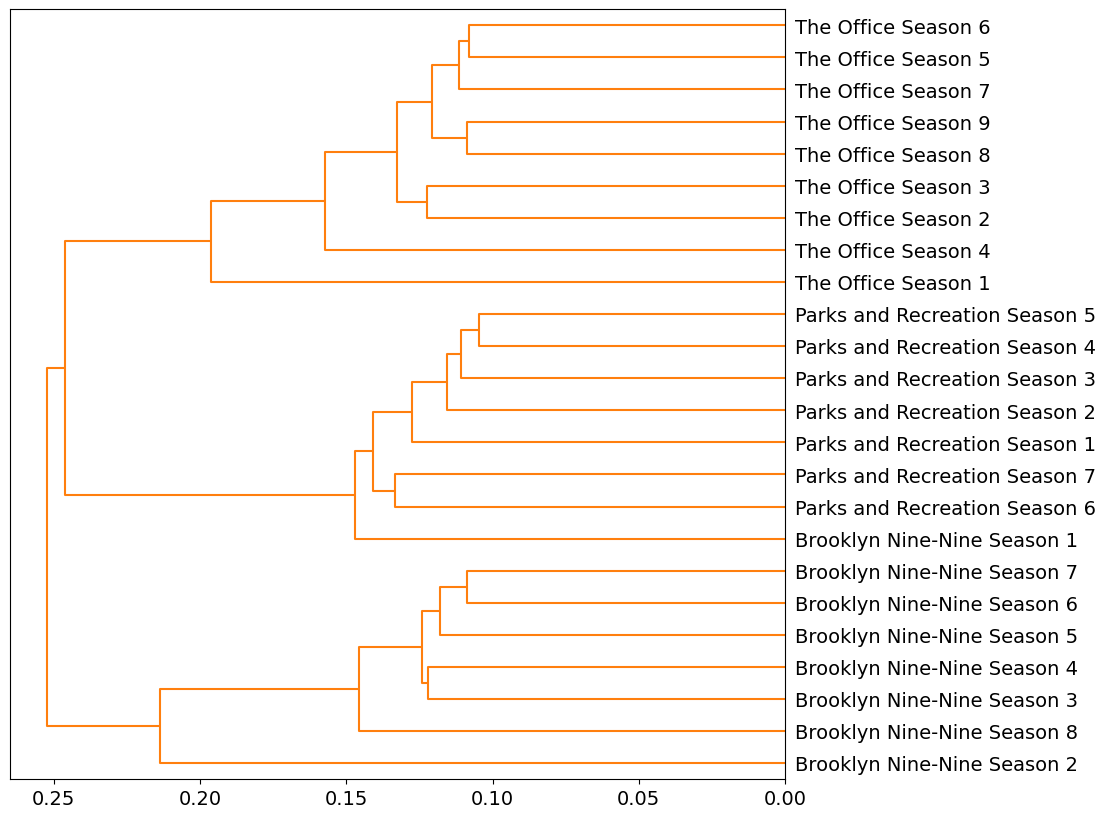

In [16]:
text_helper.hca(LIB_CLUST, PAIRS.cityblock, linkage_method='weighted', color_thresh=1)

<Figure size 640x480 with 0 Axes>

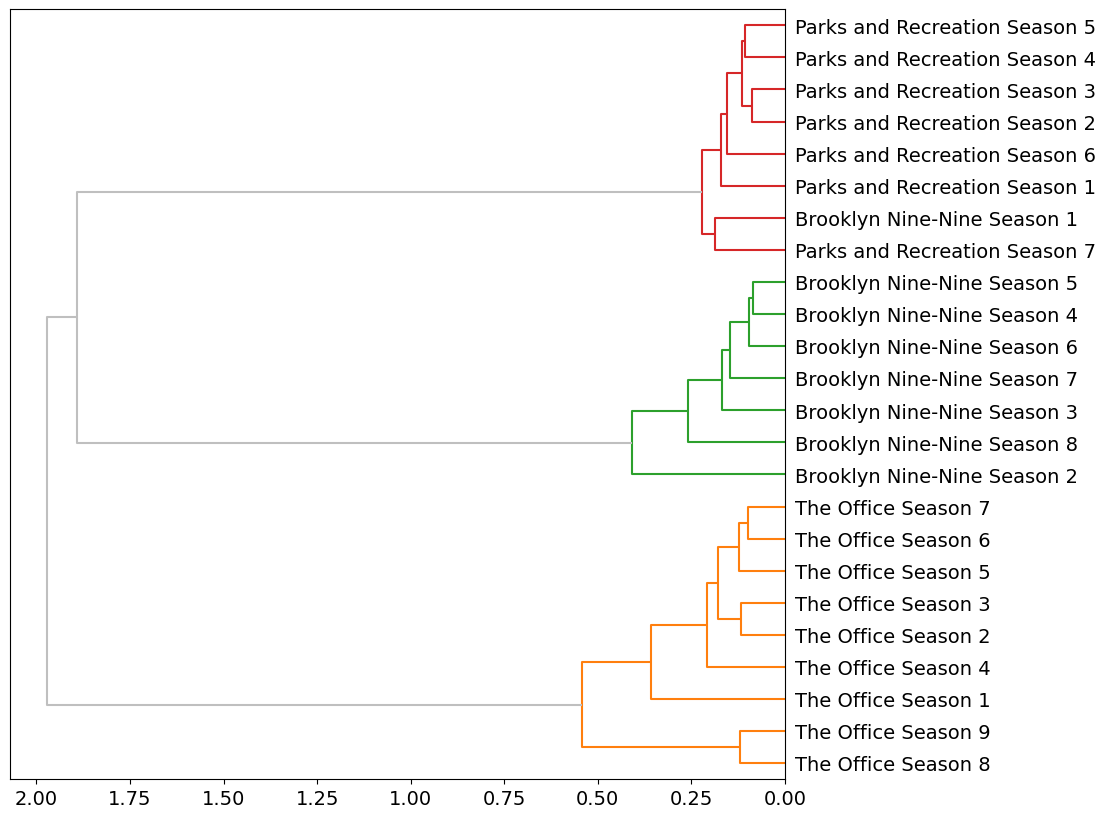

In [17]:
text_helper.hca(LIB_CLUST, PAIRS.cosine, linkage_method='ward', color_thresh=0.9)

<Figure size 640x480 with 0 Axes>

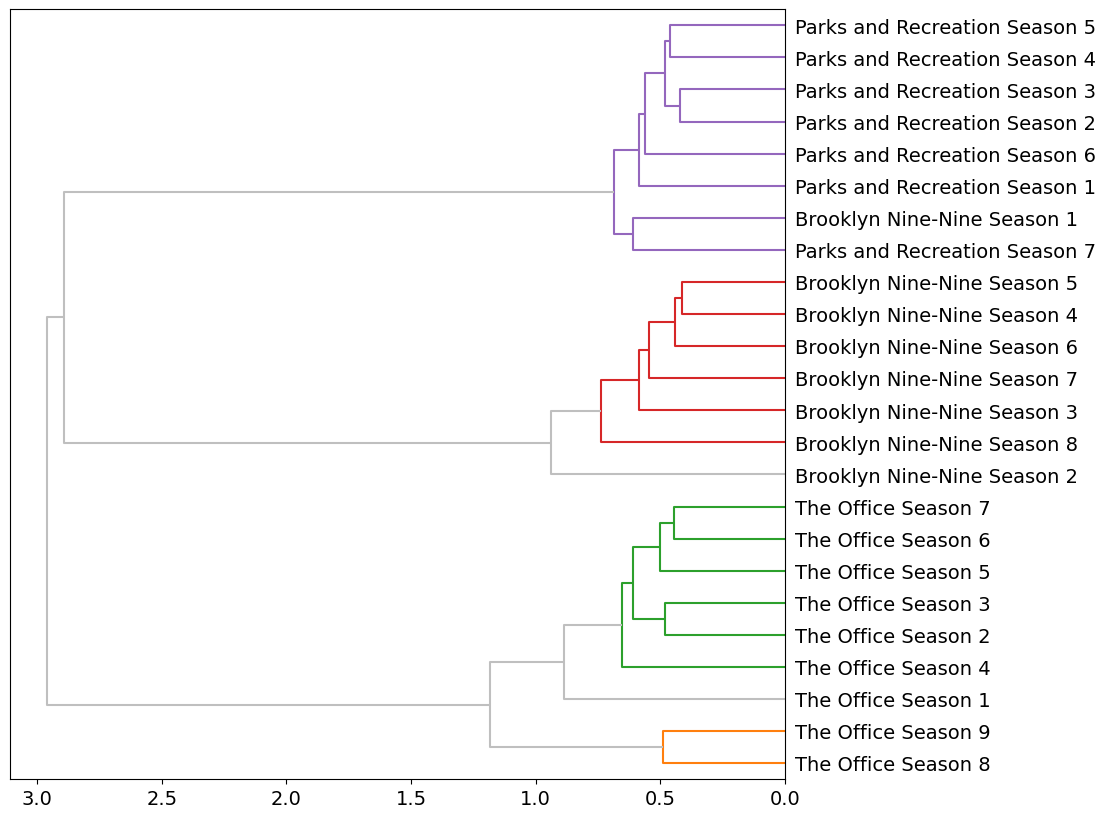

In [18]:
text_helper.hca(LIB_CLUST, PAIRS.euclidean, linkage_method='ward', color_thresh=0.8)

<Figure size 640x480 with 0 Axes>

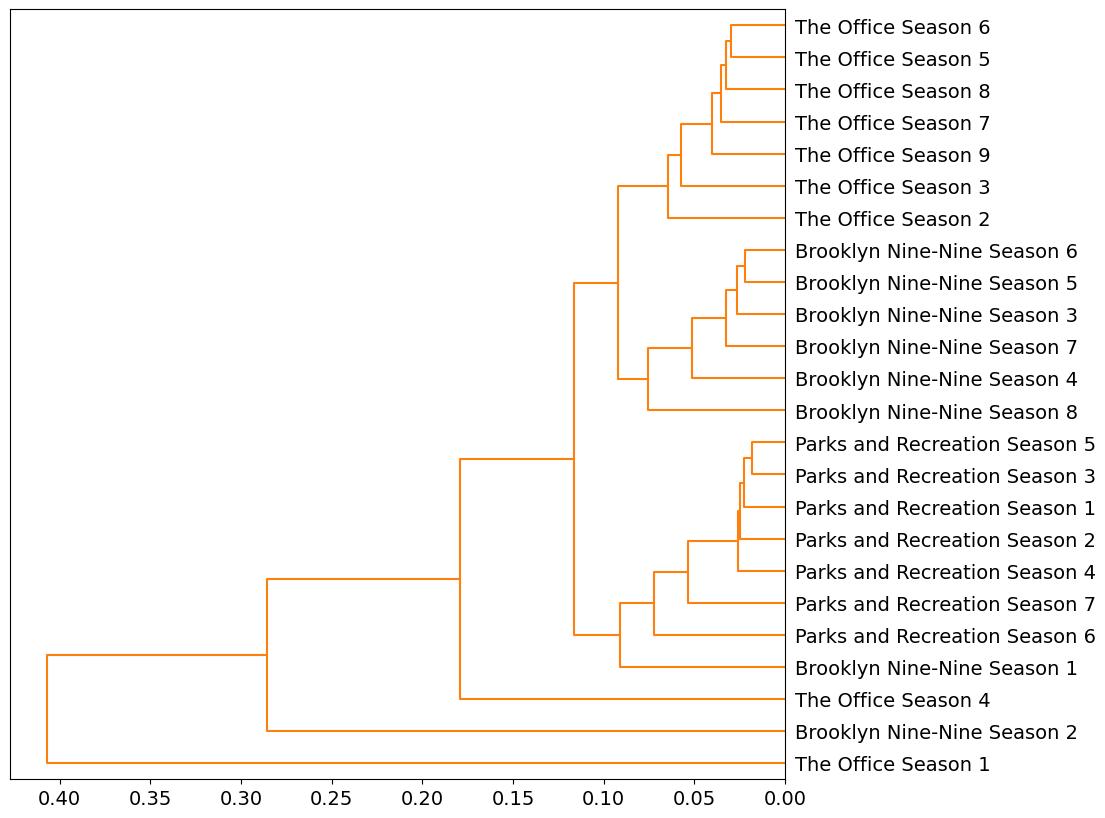

In [19]:
text_helper.hca(LIB_CLUST, PAIRS.jaccard, linkage_method='weighted', color_thresh=0.7)

<Figure size 640x480 with 0 Axes>

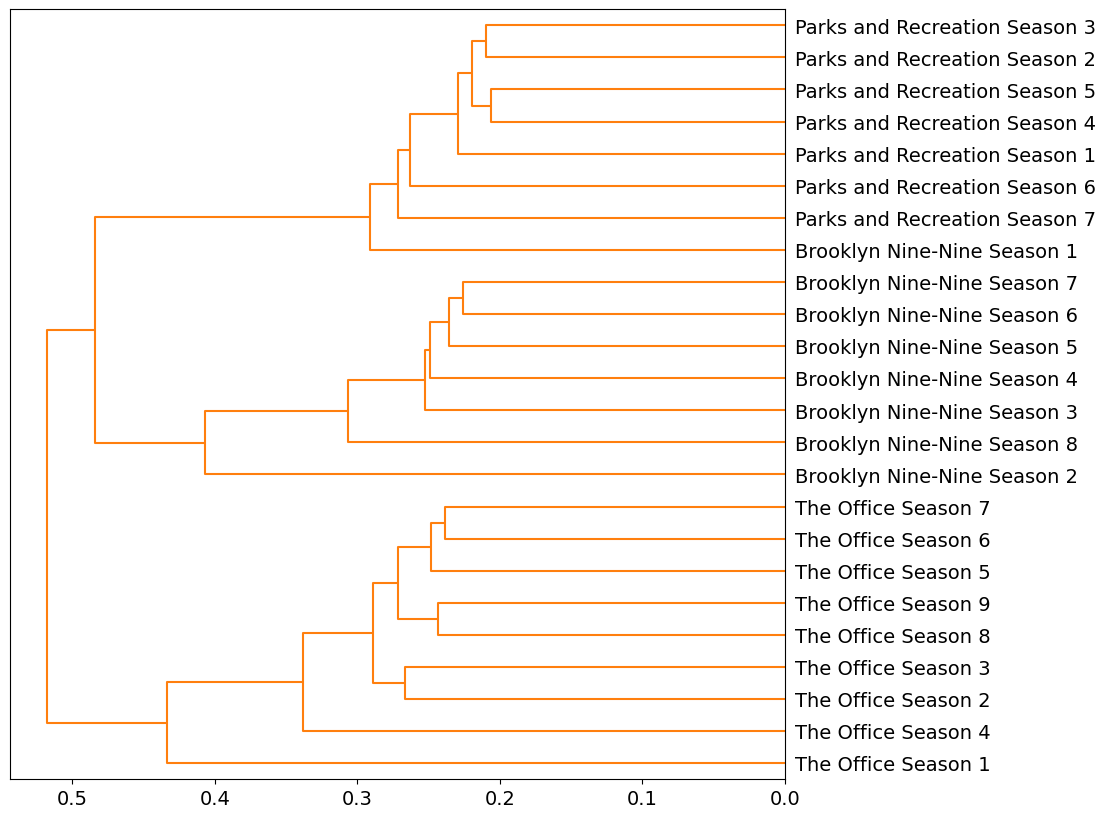

In [20]:
text_helper.hca(LIB_CLUST, PAIRS.js, linkage_method='weighted', color_thresh=0.6)

## 2. PCA

In [21]:
norm_docs = True # This has the effect of exaggerating variance when False
center_term_vectors = True # This has the effect of demoting authorship when False

pca_colors = 'Spectral'

In [60]:
CORPUS_PCA = CORPUS_RAW.copy().set_index(SEASONS)

VOCAB_PCA = VOCAB_EPS_RAW.copy().set_index('term_str')

LIB_PCA = LIB_RAW.copy().set_index(SEASONS)
LIB_PCA['rotten_tomatoes'] = LIB_PCA['rt_rating'].apply(lambda x: '90+' if x >= 90 else '89 below')

DOC_SUM, TFIDF_PCA = get_pca_doc(CORPUS_PCA, VOCAB_PCA, LIB_PCA, SEASONS)

DOC_SUM = DOC_SUM[['rotten_tomatoes', 'series_name', 'series_season']]

VSHORT = VOCAB_PCA[VOCAB_PCA.max_pos.isin(['NN', 'NNS'])].sort_values('dfidf', ascending=False).head(1000)
TFIDF_REDUCED = TFIDF_PCA[VSHORT.index]

LOADINGS, DCM, COMPS = compute_pca(
    X = TFIDF_REDUCED,
    DOC_SUM = DOC_SUM,
    k = 10,
    norm_docs = True,
    center_by_mean = False,
    center_by_variance = False,
    doc_label = 'series_season'
)

Using TF method: max


In [94]:
CORPUS_PCA = CORPUS_RAW.copy().set_index(EPISODES)

VOCAB_PCA = VOCAB_EPS_RAW.copy().set_index('term_str')

LIB_PCA = LIB_EPS_RAW.copy()
LIB_PCA['series_name'] = LIB_PCA['series_id']
LIB_PCA['series_season'] = LIB_PCA.apply(lambda x: x['series_id'] + ' ' + str(x['season_id']), axis = 1)
LIB_PCA['year'] = LIB_PCA.apply(lambda x: x['date'][:4], axis = 1)
LIB_PCA = LIB_PCA.set_index(EPISODES)

DOC_SUM, TFIDF_PCA = get_pca_doc(CORPUS_PCA, VOCAB_PCA, LIB_PCA, EPISODES)

In [95]:
DOC_SUM = DOC_SUM[['series_name', 'series_season', 'year']]

VSHORT = VOCAB_PCA[VOCAB_PCA.max_pos.isin(['NN', 'NNS'])].sort_values('dfidf', ascending=False).head(1000)
TFIDF_REDUCED = TFIDF_PCA[VSHORT.index]

LOADINGS, DCM, COMPS = compute_pca(
    X = TFIDF_REDUCED,
    DOC_SUM = DOC_SUM,
    k = 10,
    norm_docs = True,
    center_by_mean = False,
    center_by_variance = False,
    doc_label = 'series_season'
)

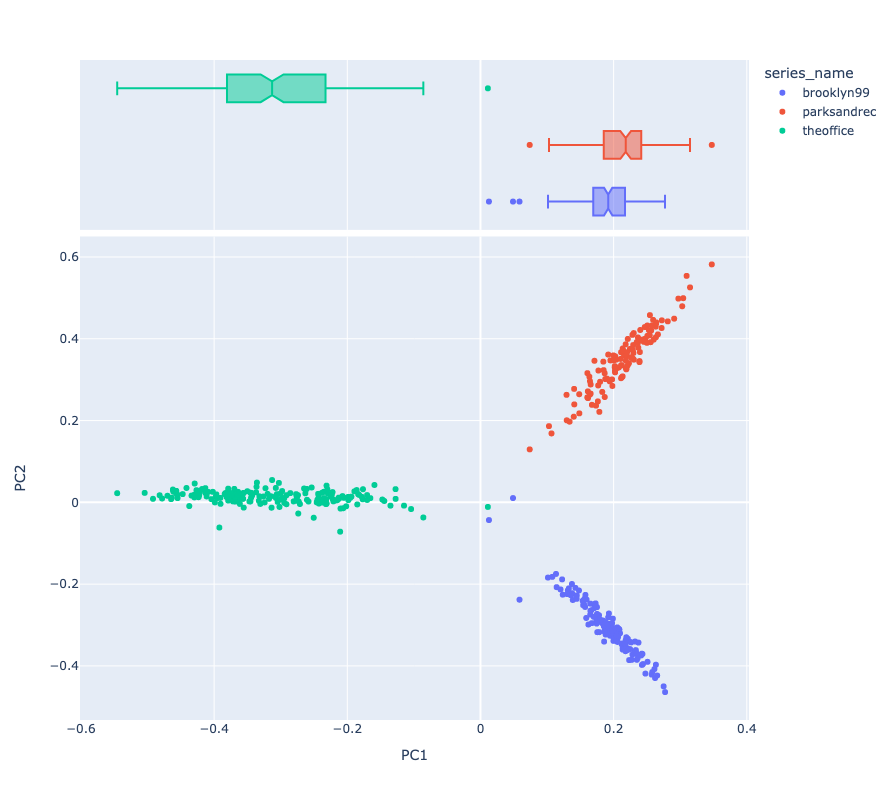

In [107]:
vis_pcs(DCM, 1, 2, label = 'series_name')

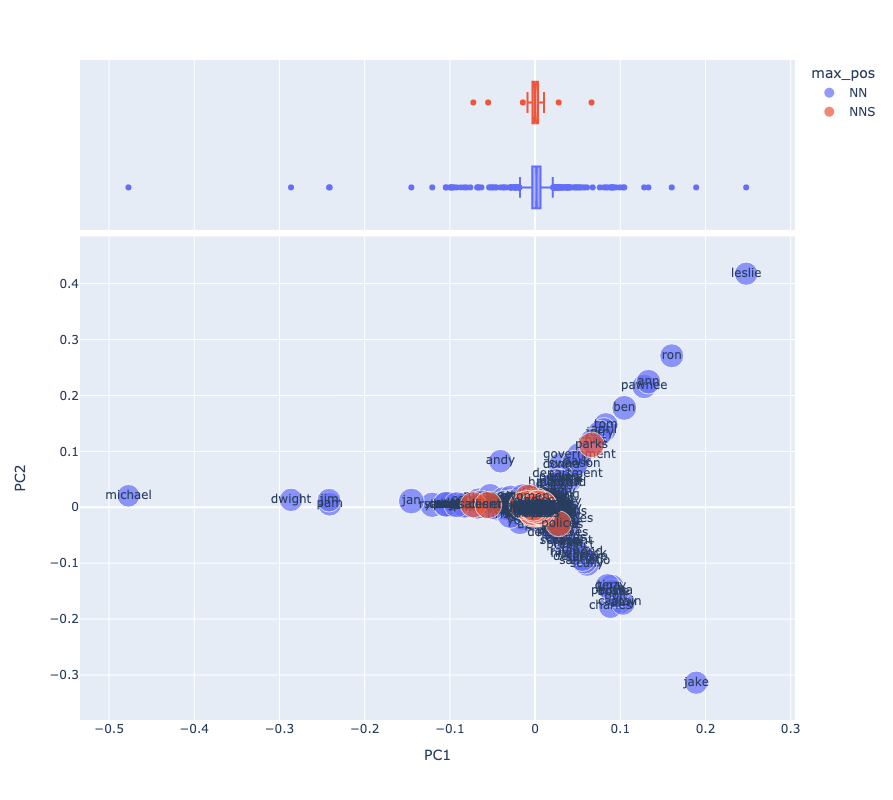

In [111]:
vis_loadings(LOADINGS, VOCAB_PCA, 1, 2, hover_name = 'series_name')

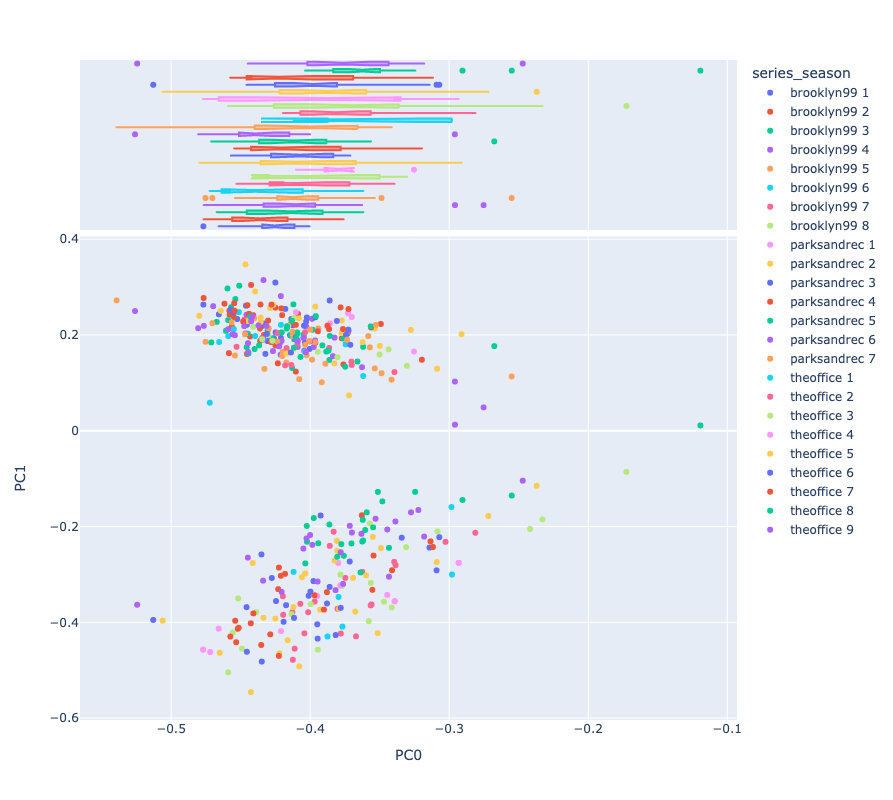

In [97]:
vis_pcs(DCM, 0, 1, label = 'series_season')

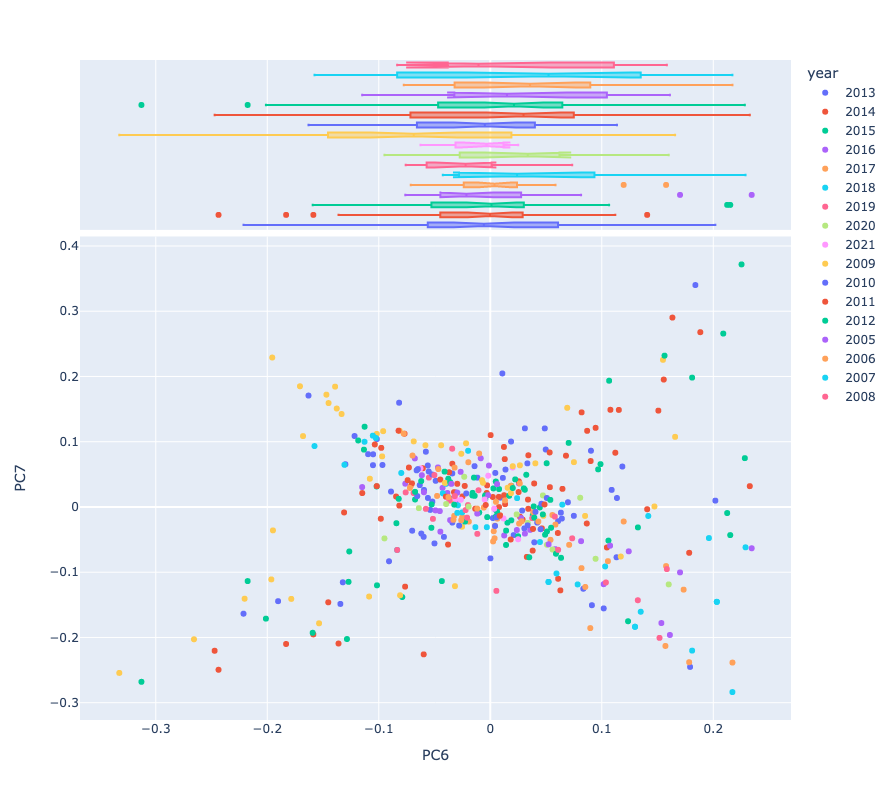

In [106]:
vis_pcs(DCM, 6, 7, label = 'year')

In [58]:
## FUNCTIONS
from sklearn.decomposition import PCA
from scipy.linalg import norm
from scipy.linalg import eigh
import plotly_express as px

def get_pca_doc(CORPUS, VOCAB, LIB, OHCO):
    BOW_PCA = text_helper.create_bow(CORPUS_PCA, OHCO)
    TFIDF_PCA, DFIDF_PCA = text_helper.compute_tfidf_dfidf(BOW_PCA, tf_method = 'max')

    DOC_PCA = TFIDF_PCA.stack().reset_index().rename(columns = {0: 'TFIDF'})
    DOC_PCA = pd.merge(DOC_PCA.reset_index(), LIB.reset_index(), on = OHCO)\
        .set_index(OHCO).drop(columns = 'index')

    DOC_SUM = DOC_PCA.reset_index().groupby(OHCO).first()
    
    return DOC_SUM, TFIDF_PCA
    
    
def compute_pca(X, DOC_SUM, k, norm_docs, center_by_mean, center_by_variance, doc_label):
    '''
    PURPOSE: compute the PCA from a given document-term count matrix

    INPUTS:
    X - The input matrix (dataframe)
    k - The number of components to generate
    norm_docs - Boolean flag to normalize the input matrix
    center_by_mean - Boolean flag to center the input matrix by its mean
    center_by_variance - Boolean flag to center the input matrix by its variance

    OUTPUTS:
    LOADINGS - The term-component matrix (dataframe)
    DCM - The document-component matrix (dataframe)
    COMPINS - The component information table (dataframe)
    '''
    if norm_docs:
        X = (X.T / norm(X, 2, axis=1)).T

    if center_by_mean:
        X = X - X.mean()

    if center_by_variance:
        X = X / X.std()

    # Compute Covariance Matrix
    COV = X.T.dot(X) / (X.shape[0] - 1)

    # Decompose the Matrix
    eig_vals, eig_vecs = eigh(COV)

    # Convert eigen to dataframes
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'


    # Select principal components
    # Combine eigenvalues and eigenvectors
    EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)

    # Compute explained variance
    EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)

    # Pick top K components
    COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(k).reset_index(drop=True)
    COMPS.index.name = 'comp_id'
    COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
    COMPS.index.name = 'pc_id'

    # See Projected Components onto Vocabulary (Loadings)
    LOADINGS = COMPS[COV.index].T
    LOADINGS.index.name = 'term_str'

    # Project Docs onto Components
    DCM = X.dot(COMPS[COV.index].T) 
    DCM_DOC = pd.merge(DCM, DOC_SUM, left_index = True, right_index = True)
    DCM_DOC['doc'] = DCM_DOC[doc_label]

    return LOADINGS, DCM_DOC, COMPS

def vis_pcs(M, a, b, label='series_name', hover_name='doc', symbol=None, size=None):
    fig = px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)
    fig.show()

def vis_loadings(M, VOCAB, a=0, b=1, hover_name='term_str'):
    X = M.join(VOCAB)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos', 
                      marginal_x='box', height=800)

In [82]:
# Parks and Rec

CORPUS_PCA_PNR = PNR_CORPUS.copy().set_index(EPISODES)

VOCAB_PCA_PNR = PNR_VOCAB_SCENES.copy().set_index('term_str')

LIB_PCA_PNR = LIB_EPS_RAW.copy()
LIB_PCA_PNR = LIB_PCA_PNR.set_index(EPISODES)
LIB_PCA_PNR = LIB_PCA_PNR[LIB_PCA_PNR.index.isin(['parksandrec'], level = 'series_id')]

DOC_SUM_PNR, TFIDF_PCA_PNR = get_pca_doc(CORPUS_PCA_PNR, VOCAB_PCA_PNR, LIB_PCA_PNR, EPISODES)

DOC_SUM_PNR = DOC_SUM_PNR[['director', 'first_writer', 'series_season_ep']]

VSHORT_PNR = VOCAB_PCA_PNR[VOCAB_PCA_PNR.max_pos.isin(['NN', 'NNS'])].sort_values('dfidf', ascending=False).head(1000)
TFIDF_REDUCED_PNR = TFIDF_PCA_PNR[VSHORT_PNR.index]

LOADINGS_PNR, DCM_PNR, COMPS_PNR = compute_pca(
    X = TFIDF_REDUCED_PNR,
    DOC_SUM = DOC_SUM_PNR,
    k = 10,
    norm_docs = True,
    center_by_mean = False,
    center_by_variance = False,
    doc_label = 'series_season_ep'
)

Using TF method: max


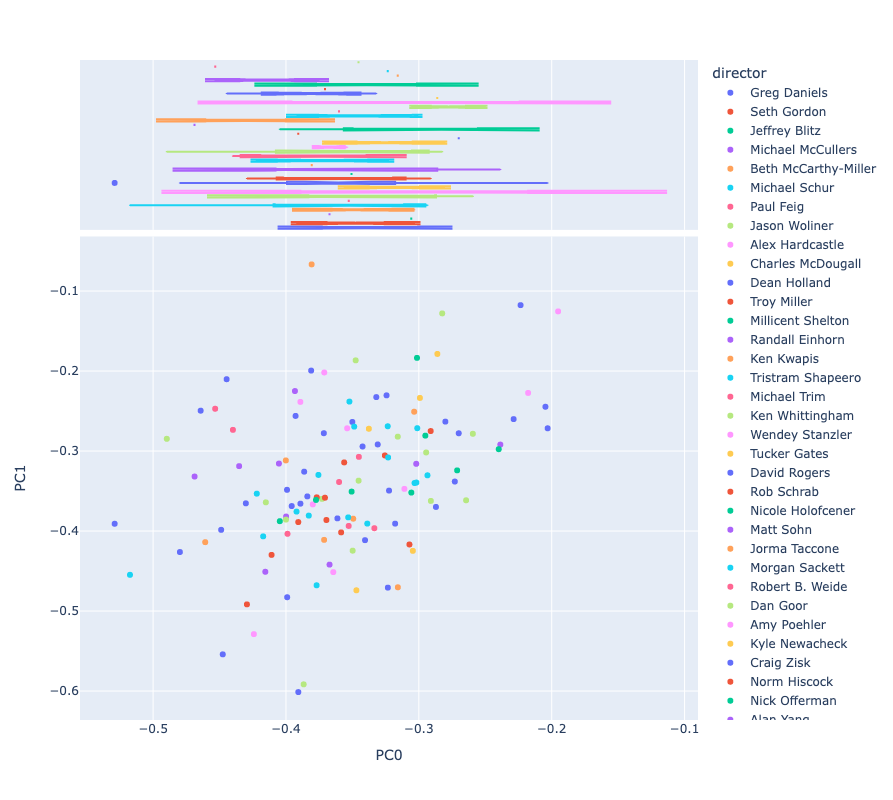

In [88]:
vis_pcs(DCM_PNR, 0, 1, label = 'director')

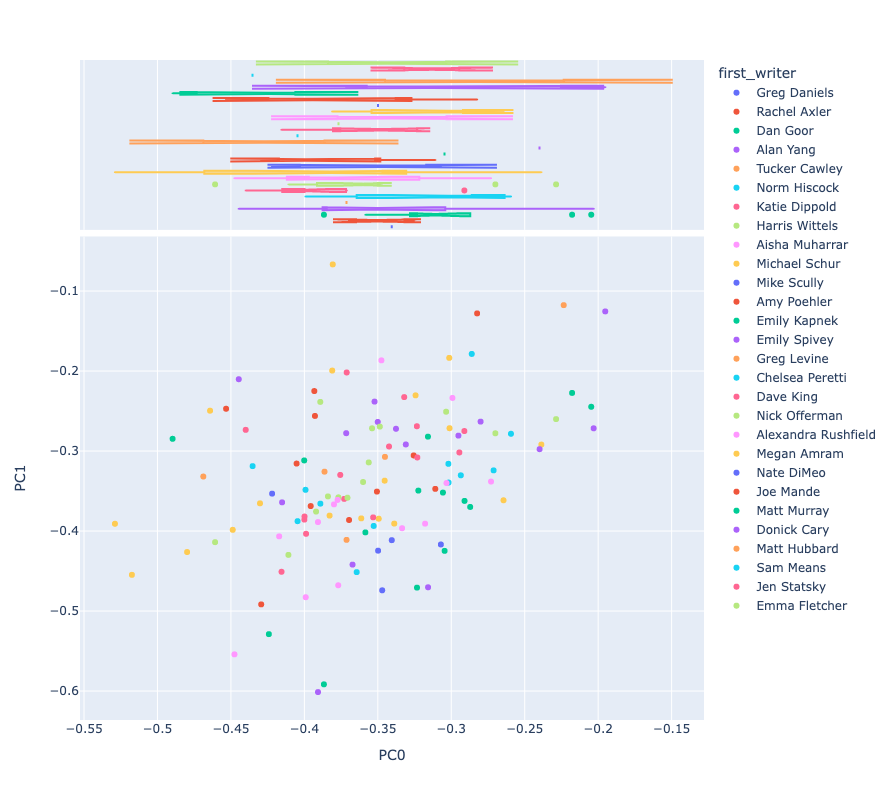

In [84]:
vis_pcs(DCM_PNR, 0, 1, label = 'first_writer')

In [66]:
# BROOKLYN 99

CORPUS_PCA_B99 = B99_CORPUS.copy().set_index(EPISODES)

VOCAB_PCA_B99 = B99_VOCAB_SCENES.copy().set_index('term_str')

LIB_PCA_B99 = LIB_EPS_RAW.copy()
LIB_PCA_B99 = LIB_PCA_B99.set_index(EPISODES)
LIB_PCA_B99 = LIB_PCA_B99[LIB_PCA_B99.index.isin(['brooklyn99'], level = 'series_id')]

DOC_SUM_B99, TFIDF_PCA_B99 = get_pca_doc(CORPUS_PCA_B99, VOCAB_PCA_B99, LIB_PCA_B99, EPISODES)

DOC_SUM_B99 = DOC_SUM_B99[['director', 'first_writer', 'series_season_ep']]

VSHORT_B99 = VOCAB_PCA_B99[VOCAB_PCA_B99.max_pos.isin(['NN', 'NNS'])].sort_values('dfidf', ascending=False).head(1000)
TFIDF_REDUCED_B99 = TFIDF_PCA_B99[VSHORT_B99.index]

LOADINGS_B99, DCM_B99, COMPS_B99 = compute_pca(
    X = TFIDF_REDUCED_B99,
    DOC_SUM = DOC_SUM_B99,
    k = 10,
    norm_docs = True,
    center_by_mean = False,
    center_by_variance = False,
    doc_label = 'series_season_ep'
)

Using TF method: max


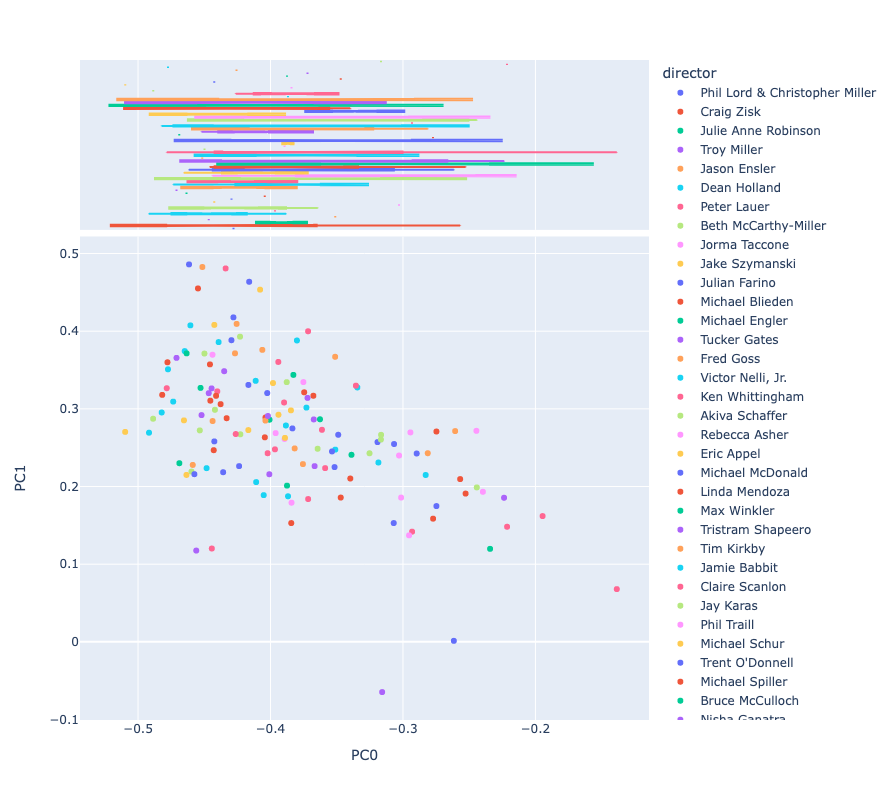

In [67]:
vis_pcs(DCM_B99, 0, 1, label = 'director')

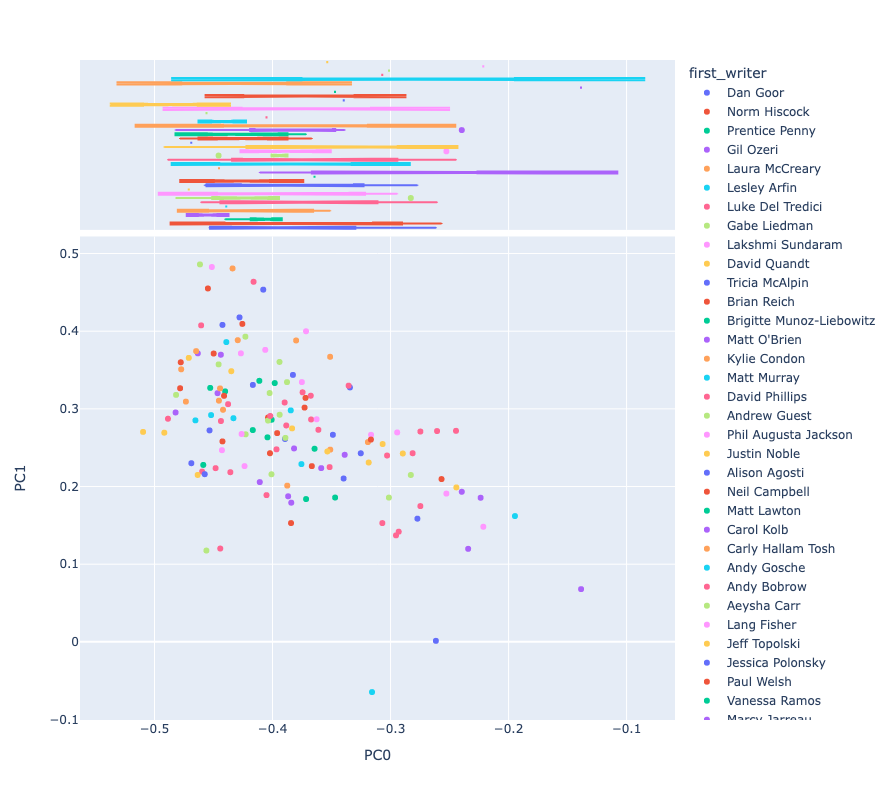

In [68]:
vis_pcs(DCM_B99, 0, 1, label = 'first_writer')

In [79]:
# OFFICE

CORPUS_PCA_OFFICE = OFFICE_CORPUS.copy().set_index(EPISODES)

VOCAB_PCA_OFFICE = OFFICE_VOCAB_SCENES.copy().set_index('term_str')

LIB_PCA_OFFICE = LIB_EPS_RAW.copy()
LIB_PCA_OFFICE = LIB_PCA_OFFICE.set_index(EPISODES)
LIB_PCA_OFFICE = LIB_PCA_OFFICE[LIB_PCA_OFFICE.index.isin(['theoffice'], level = 'series_id')]

DOC_SUM_OFFICE, TFIDF_PCA_OFFICE = get_pca_doc(CORPUS_PCA_OFFICE, VOCAB_PCA_OFFICE, LIB_PCA_OFFICE, EPISODES)

DOC_SUM_OFFICE = DOC_SUM_OFFICE[['director', 'first_writer', 'series_season_ep']]

VSHORT_OFFICE = VOCAB_PCA_OFFICE[VOCAB_PCA_OFFICE.max_pos.isin(['NN', 'NNS'])].sort_values('dfidf', ascending=False).head(1000)
TFIDF_REDUCED_OFFICE = TFIDF_PCA_OFFICE[VSHORT_OFFICE.index]

LOADINGS_OFFICE, DCM_OFFICE, COMPS_OFFICE = compute_pca(
    X = TFIDF_REDUCED_OFFICE,
    DOC_SUM = DOC_SUM_OFFICE,
    k = 10,
    norm_docs = True,
    center_by_mean = False,
    center_by_variance = False,
    doc_label = 'series_season_ep'
)

Using TF method: max


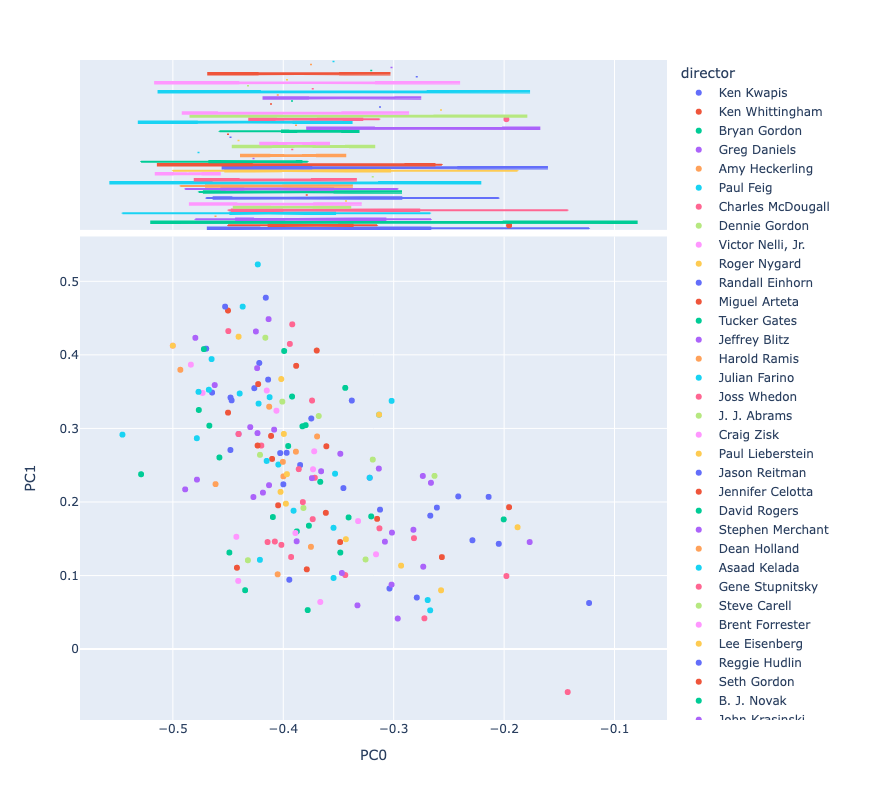

In [80]:
vis_pcs(DCM_OFFICE, 0, 1, label = 'director')

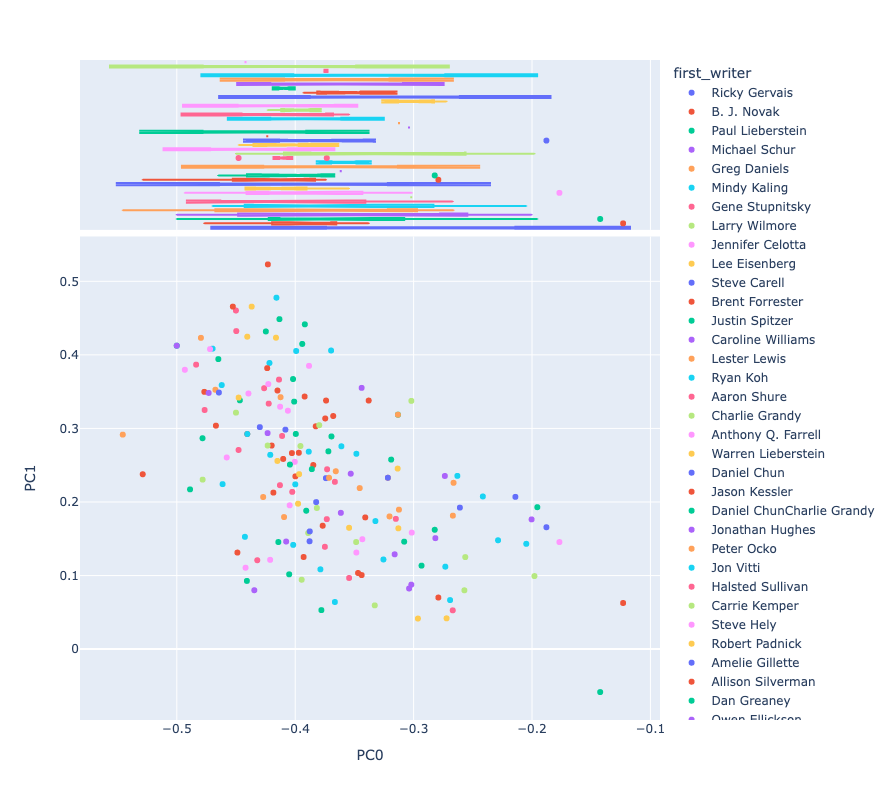

In [81]:
vis_pcs(DCM_OFFICE, 0, 1, label = 'first_writer')

## 3. Topic Modeling

In [112]:
# Parameters for the topic model

ngram_range = [1,2]
n_terms = 4000 # max features for the count vectorizer
n_topics = 20 # number of components for LDA
max_iter = 5 # max iter for LDA
n_top_terms = 7 # number of words used to characterize a topic

In [113]:
CORPUS_TOPIC = CORPUS_RAW.copy()
CORPUS_TOPIC = CORPUS_TOPIC.set_index(SCENES)
CORPUS_TOPIC

Unnamed: 0  line_id  token_id  \
series_id   season_id episode_id scene_id                                  
parksandrec 1         1          1                  0        1         0   
                                 1                  1        1         1   
                                 1                  2        2         0   
                                 1                  3        2         1   
                                 1                  4        2         2   
...                                               ...      ...       ...   
theoffice   9         23         15            564623      103         1   
                                 15            564624      103         2   
                                 15            564625      103         3   
                                 15            564626      103         4   
                                 15            564627      103         5   

                                                  pos_tuple   pos token_str  \
series_id   season_id episode_id scene_id                                     
parksandrec 1         1          1         ('Hello.', 'NN')    NN    Hello.   
                                 1            ('Hi.', 'NN')    NN       Hi.   
                                 1           ('My', 'PRP$')  PRP$        My   
                                 1           ('name', 'NN')    NN      name   
                                 1            ('is', 'VBZ')   VBZ        is   
...                                                     ...   ...       ...   
theoffice   9         23         15          ('that', 'IN')    IN      that   
                                 15          ('kind', 'NN')    NN      kind   
                                 15            ('of', 'IN')    IN        of   
                                 15           ('the', 'DT')    DT       the   
                                 15        ('point?', 'NN')    NN    point?   

                                          term_str  
series_id   season_id episode_id scene_id           
parksandrec 1         1          1           hello  
                                 1              hi  
                                 1              my  
                                 1            name  
                                 1              is  
...                                            ...  
theoffice   9         23         15           that  
                                 15           kind  
                                 15             of  
                                 15            the  
                                 15          point  

[1563801 rows x 7 columns]

In [117]:
THETA, PHI, TOPICS = text_helper.generate_topic_model(
    BAG = SCENES,
    TOKENS = CORPUS_TOPIC,
    ngram_range = ngram_range,
    n_terms = n_terms,
    n_topics = n_topics,
    max_iter = max_iter,
    n_top_terms = n_top_terms,
    remove_stop = False
)

In [118]:
THETA.sample(20).style.background_gradient(cmap=colors, axis=None)

In [119]:
TOPICS.sort_values(by = 'term_freq', ascending = False).head(20)

term_str     0        1          2         3       4          5       6  \
topic_id                                                                  
T03         im    gonna         oh     right    okay      youre    dont   
T13         im       oh      youre     right     hes       jake    dont   
T04         im     dont      gonna      yeah   right      thats      oh   
T14         oh       im       yeah      okay     hey       dont     pam   
T05       okay  michael      right        im  dwight       yeah   youre   
T00       dont       im       yeah        oh   thats      youre   right   
T02         oh      hey      thats      okay   right       yeah    guys   
T06         im       oh       dont     think    okay        yes    yeah   
T18       dont    thats       okay      yeah   think         im      oh   
T17        ron     okay         im    leslie   youre       dont  pawnee   
T08       dont       oh       okay        im    yeah        hey   right   
T11         oh       im        god      okay  oh god      youre  leslie   
T09       okay       im      right      want     hey       dont      ha   
T19       know     dont         im      time    yeah       love   think   
T15       dont     okay       know     right    tell         im    yeah   
T07       whoa    thats  whoa whoa        im    dont         oh     yes   
T01         im    youre       dont      okay    want      right    love   
T16         im    sorry      thank  im sorry    dont       time   youre   
T12       cool       oh      right     youre    okay  cool cool      im   
T10       okay       im      right      know    yeah      gonna    dont   

term_str                                              label  doc_weight_sum  \
topic_id                                                                      
T03             T03 im, gonna, oh, right, okay, youre, dont      734.885628   
T13               T13 im, oh, youre, right, hes, jake, dont      668.121968   
T04             T04 im, dont, gonna, yeah, right, thats, oh      660.874898   
T14                  T14 oh, im, yeah, okay, hey, dont, pam      577.247944   
T05       T05 okay, michael, right, im, dwight, yeah, youre      546.630008   
T00             T00 dont, im, yeah, oh, thats, youre, right      328.765294   
T02             T02 oh, hey, thats, okay, right, yeah, guys      334.252682   
T06                T06 im, oh, dont, think, okay, yes, yeah      311.718864   
T18              T18 dont, thats, okay, yeah, think, im, oh      297.787387   
T17          T17 ron, okay, im, leslie, youre, dont, pawnee      318.351868   
T08                T08 dont, oh, okay, im, yeah, hey, right      272.709262   
T11            T11 oh, im, god, okay, oh god, youre, leslie      262.301622   
T09                T09 okay, im, right, want, hey, dont, ha      242.528003   
T19             T19 know, dont, im, time, yeah, love, think      220.539007   
T15             T15 dont, okay, know, right, tell, im, yeah      214.426511   
T07           T07 whoa, thats, whoa whoa, im, dont, oh, yes      164.064079   
T01            T01 im, youre, dont, okay, want, right, love      167.142713   
T16       T16 im, sorry, thank, im sorry, dont, time, youre      161.776274   
T12         T12 cool, oh, right, youre, okay, cool cool, im      151.280956   
T10            T10 okay, im, right, know, yeah, gonna, dont      114.595031   

term_str  term_freq  
topic_id             
T03        0.121880  
T13        0.106529  
T04        0.102846  
T14        0.083941  
T05        0.070553  
T00        0.051964  
T02        0.047336  
T06        0.045710  
T18        0.043601  
T17        0.043541  
T08        0.041474  
T11        0.040580  
T09        0.034302  
T19        0.031196  
T15        0.027592  
T07        0.024922  
T01        0.022966  
T16        0.022009  
T12        0.021127  
T10        0.015933

In [144]:
## PNR

CORPUS_TOPIC_PNR = PNR_CORPUS.copy()
CORPUS_TOPIC_PNR = CORPUS_TOPIC_PNR.set_index(SCENES)

VOCAB_TOPIC_PNR = PNR_VOCAB_SCENES.copy().set_index('term_str')

filler_words = ['im', 'oh', 'dont', 'youre', 'right', 'thats', 'okay', 'yeah', 'gonna', 'hey', 'hes', 'want', 'ive', 'whats']
CORPUS_TOPIC_PNR = CORPUS_TOPIC_PNR[~CORPUS_TOPIC_PNR.term_str.isin(filler_words)]

THETA_PNR, PHI_PNR, TOPICS_PNR = text_helper.generate_topic_model(
    BAG = SCENES,
    TOKENS = CORPUS_TOPIC_PNR,
    ngram_range = ngram_range,
    n_terms = n_terms,
    n_topics = 10,
    max_iter = max_iter,
    n_top_terms = n_top_terms,
    remove_stop = False
)

In [145]:
TOPICS_PNR.sort_values(by = 'term_freq', ascending = False).head(20)

term_str       0       1       2        3       4       5       6  \
topic_id                                                            
T02          ron    know   think      yes    time    need     god   
T03       pawnee  people    know    think  leslie    time    guys   
T04          yes  leslie    know    think    mean    time  people   
T08        think    need     ann   leslie    talk     god     ron   
T05         time     yes   sorry  newport   bobby    look   think   
T00        think   thank     ron     look     god    need    know   
T01          ann   think  leslie     love    know    work    look   
T09         need   think  people     look    work  pawnee    lets   
T06        sorry    know    guys     time  people    work  pawnee   
T07          pit   think    tell      ron     god  people    love   

term_str                                              label  doc_weight_sum  \
topic_id                                                                      
T02              T02 ron, know, think, yes, time, need, god      360.289097   
T03       T03 pawnee, people, know, think, leslie, time,...      244.507605   
T04        T04 yes, leslie, know, think, mean, time, people      237.343980   
T08            T08 think, need, ann, leslie, talk, god, ron      170.955124   
T05       T05 time, yes, sorry, newport, bobby, look, think      156.665872   
T00            T00 think, thank, ron, look, god, need, know      158.503572   
T01          T01 ann, think, leslie, love, know, work, look      153.411574   
T09       T09 need, think, people, look, work, pawnee, lets      141.802726   
T06       T06 sorry, know, guys, time, people, work, pawnee      127.822163   
T07            T07 pit, think, tell, ron, god, people, love       78.698288   

term_str  term_freq  
topic_id             
T02        0.189469  
T03        0.138750  
T04        0.127785  
T08        0.093302  
T05        0.089065  
T00        0.087902  
T01        0.083474  
T09        0.078139  
T06        0.069317  
T07        0.042797

In [131]:
import nltk

sw = nltk.corpus.stopwords.words('english')

In [133]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each